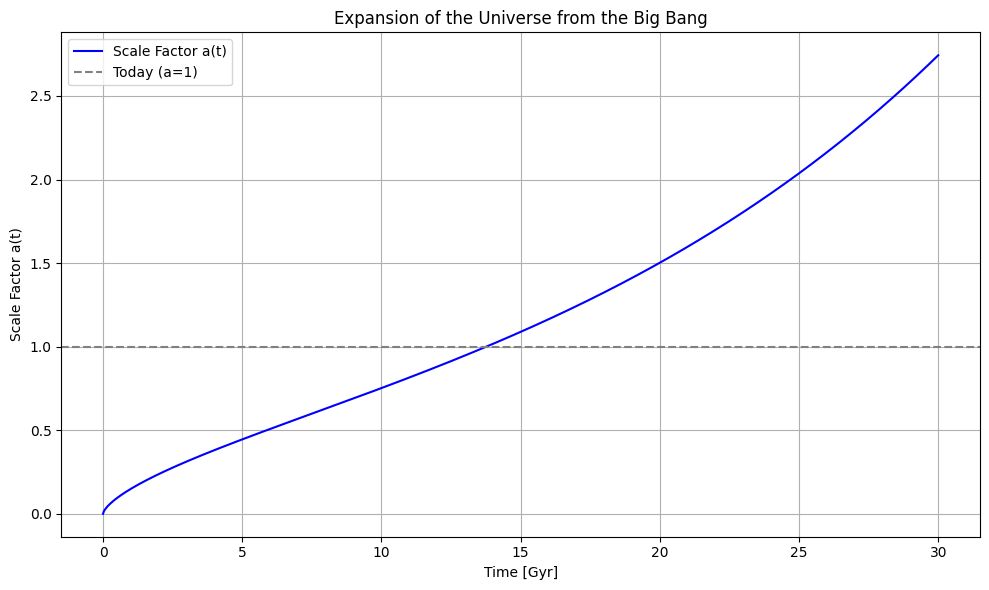

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
H0 = 0.070  # Hubble constant in Gyr^-1
Omega_r = 8.24e-5  # Radiation density
Omega_m = 0.3      # Matter density
Omega_lambda = 1.0 - Omega_m - Omega_r  # Dark energy

# Friedmann equation: da/dt = a * H0 * sqrt(...)
def friedmann(t, a):
    return a * H0 * np.sqrt(Omega_r / a**4 + Omega_m / a**3 + Omega_lambda)

# Time span: start from t=1e-4 Gyr to avoid a=0 (singularity) up to 30 Gyr
t_start = 1e-4
t_end = 30
a_init = 1e-8  # very early universe, close to a=0

# Integrate
sol = solve_ivp(friedmann, [t_start, t_end], [a_init], t_eval=np.linspace(t_start, t_end, 1000))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='Scale Factor a(t)', color='blue')
plt.axhline(1.0, color='gray', linestyle='--', label='Today (a=1)')
plt.title('Expansion of the Universe from the Big Bang')
plt.xlabel('Time [Gyr]')
plt.ylabel('Scale Factor a(t)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
